In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [186]:
from os import listdir
from os.path import isfile, join

image = 1
mypath = '../data/imagesprojets5/photo/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [187]:
onlyfiles

['image_1_1.jpg',
 'image_1_2.jpg',
 'image_1_3.jpg',
 'image_2_1.jpg',
 'image_2_2.jpg',
 'image_2_3.jpg',
 'image_2_4.jpg',
 'image_2_5.jpg',
 'image_3_1.jpg']

In [283]:
img_file = onlyfiles[4]
origin_file = '../data/imagesprojets5/originals/image_1.jpg' 

In [284]:
img = cv2.imread(mypath + img_file)
origin = cv2.imread(origin_file)

In [285]:
img.shape

(1875, 2583, 3)

Text(0.5, 1.0, 'origin image')

<Figure size 720x720 with 0 Axes>

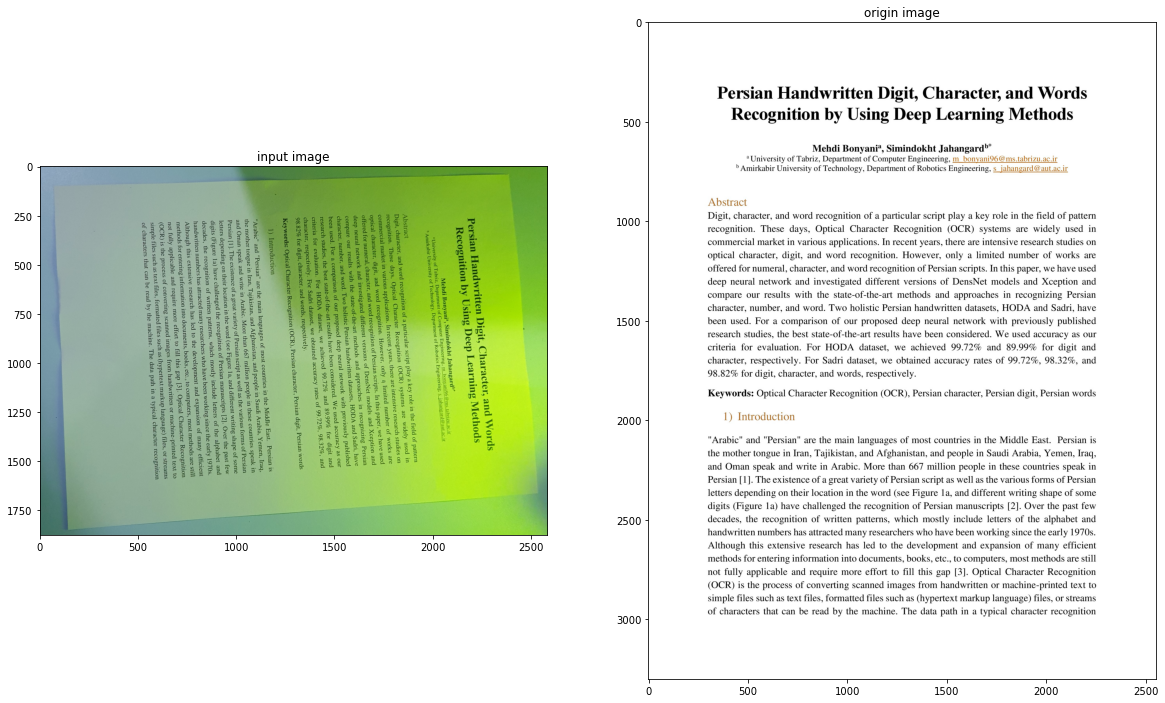

In [286]:
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [20,20]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img)
ax1.set_title('input image')
ax2.imshow(origin)
ax2.set_title('origin image')

In [287]:
import imutils

In [288]:
if img.shape[1]>img.shape[0]:
    angle = -90
    img = imutils.rotate_bound(img, angle)

In [289]:
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width, height)

img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
origin = cv2.resize(origin,dim, interpolation = cv2.INTER_AREA)

Text(0.5, 1.0, 'origin image')

<Figure size 720x720 with 0 Axes>

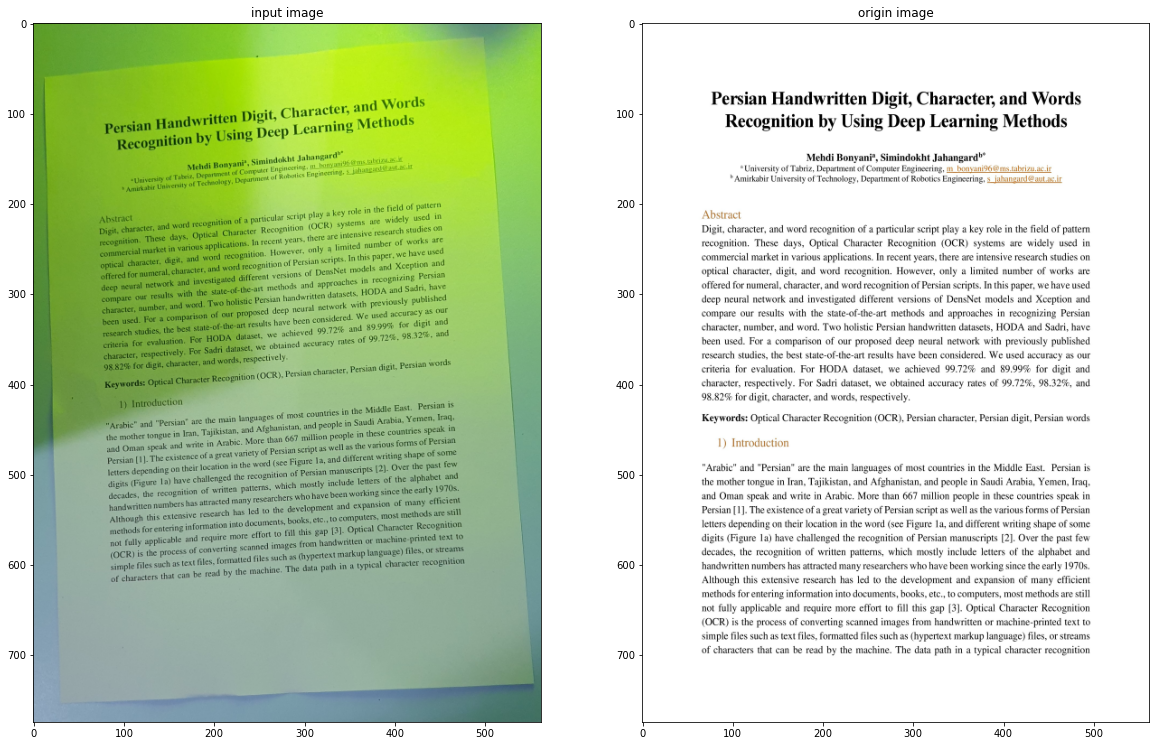

In [290]:
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [20,20]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img)
ax1.set_title('input image')
ax2.imshow(origin)
ax2.set_title('origin image')

In [291]:

## FIX
orb = cv2.ORB_create()

# find the keypoints with ORB
kp1 = orb.detect(img,None)

# compute the descriptors with ORB
kp1, des1 = orb.compute(img, kp1)

In [292]:
kp2 = orb.detect(origin,None)
kp2, des2 = orb.compute(origin, kp2)

In [293]:
# find the keypoints and descriptors with SIFT


In [294]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)


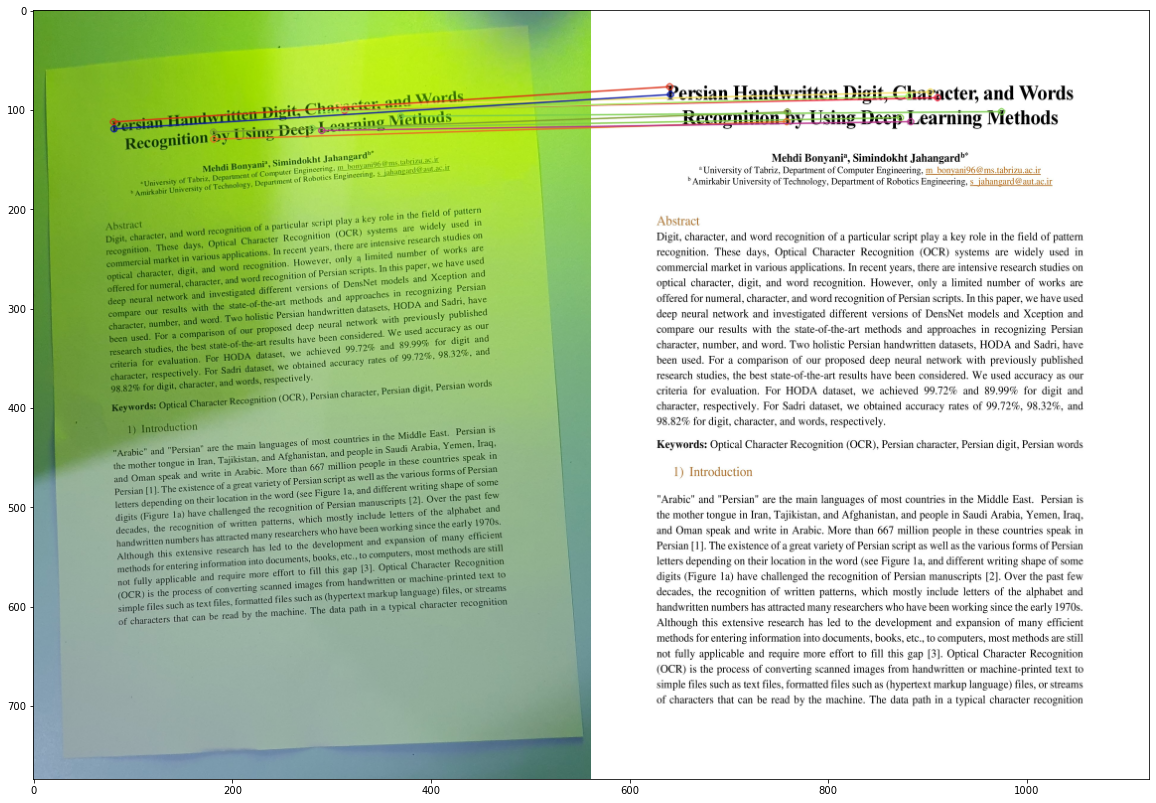

(<matplotlib.image.AxesImage at 0x26d880f6c88>, None)

In [295]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img,kp1,origin,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()

In [296]:
src=[]
dest=[]
for match in matches[:100]:
    kp_img1=kp1[match.queryIdx]
    kp_img2=kp2[match.trainIdx]
    src.append((kp_img1.pt[0],kp_img1.pt[1]))
    dest.append((kp_img2.pt[0],kp_img2.pt[1])) 

In [297]:
h, status = cv2.findHomography(np.array(src), np.array(dest),cv2.RANSAC, 5.0)
print(h)

[[ 1.21496333e+00 -2.50196757e-02 -1.39073310e+01]
 [ 1.25698160e-01  1.38899529e+00 -8.72059086e+01]
 [ 7.76937442e-05  1.88823965e-04  1.00000000e+00]]


In [298]:
height,width=origin.shape[:2]
img1=origin.copy()
img2=img.copy()
rows1, cols1 = img1.shape[:2]
rows2, cols2 = img2.shape[:2]


In [299]:

list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1, rows1], [cols1,0]]).reshape(-1,1,2)
temp_points = np.float32([[0,0], [0,rows2], [cols2, rows2], [cols2,0]]).reshape(-1,1,2)

list_of_points_2 = cv2.perspectiveTransform(temp_points, h)
list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

[x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
[x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

# translation_dist = [-x_min, -y_min]
# H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])

im_out = cv2.warpPerspective(img,h,(x_max - x_min, y_max - y_min))
# before_stitch=im_out.copy()
# im_out[translation_dist[1]:rows1+translation_dist[1],translation_dist[0]:cols1+translation_dist[0]] = img1

In [300]:
im_out

array([[[113, 168,  34],
        [122, 176,  33],
        [122, 177,  28],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[112, 166,  32],
        [122, 175,  31],
        [122, 177,  26],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[114, 167,  34],
        [123, 176,  31],
        [123, 177,  25],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

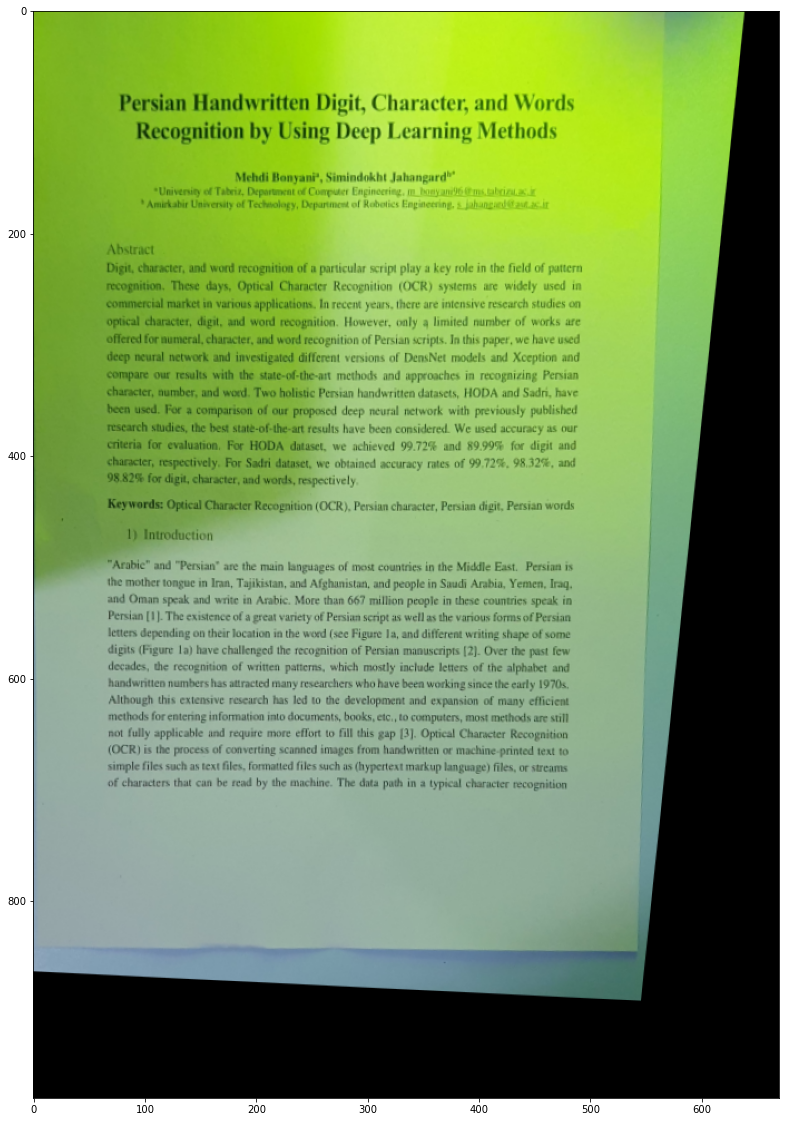

(<matplotlib.image.AxesImage at 0x26d89c86b08>, None)

In [301]:
plt.imshow(im_out),plt.show()

In [302]:
def detect_lines(img):
    """
    Returns lines in a text image, uses opencv to first apply a morphology then findContours to detect the contours of a text.
    Uses the following algorithm for contour detection : 
    Suzuki, S. and Abe, K., Topological Structural Analysis of Digitized Binary Images by Border Following. CVGIP 30 1, pp 32-46 (1985)
    """
    # convert to gray
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else : 
        gray = img.copy()
    # threshold the grayscale image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # use morphology erode to blur horizontally
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
    
    # find contours
    cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

    # find the topmost box
    ythresh = 1000000
    for c in cntrs:
        box = cv2.boundingRect(c)
        x,y,w,h = box
        if y < ythresh:
            topbox = box
            ythresh = y

    # Draw contours excluding the topmost box
    result = img.copy()
    for c in cntrs:
        box = cv2.boundingRect(c)
        if box != topbox:
            x,y,w,h = box
            cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
    return cntrs,result,morph,thresh

In [303]:
cntrs,result,morph,thresh = detect_lines(im_out[:850,:550])

In [310]:
cv2.imwrite('after_img.jpg',im_out[:850,:550])

True

Text(0.5, 1.0, 'morphology image')

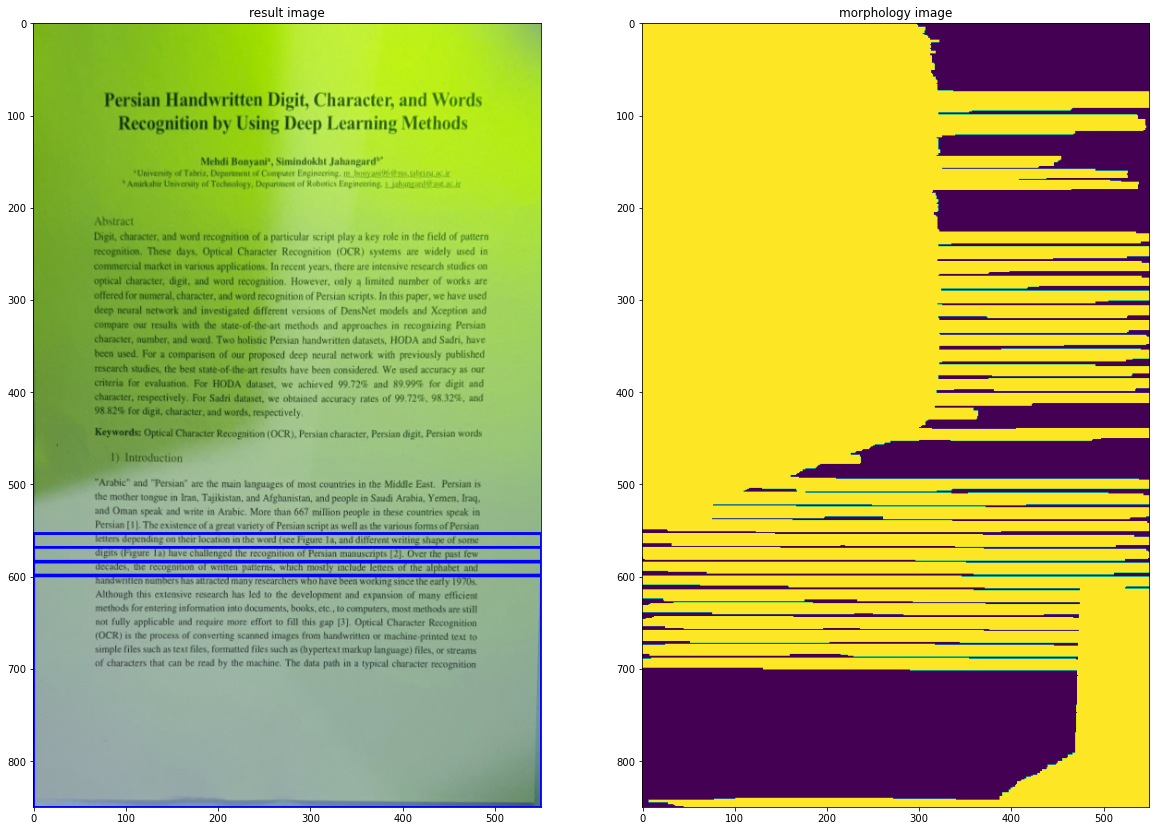

In [304]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [30,20]

ax1.imshow(result)
ax1.set_title('result image')

ax2.imshow(morph)
ax2.set_title('morphology image')

In [315]:
from pytesseract import Output
import cv2
img = cv2.imread('after_img.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


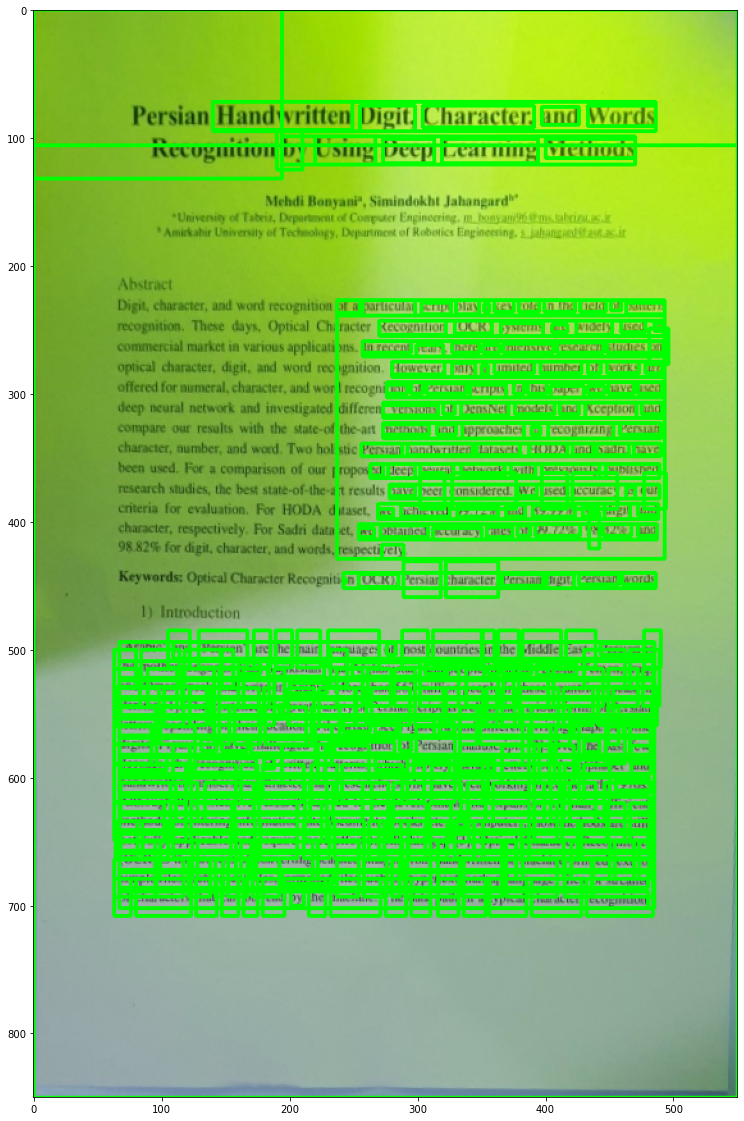

In [316]:
plt.imshow(img)

In [312]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
print(pytesseract.image_to_string('after_img.jpg'))

   

Handwritten Digit, Character, and Words

by Using Deep Learning Methods

  

ff &panicular script play a key role inthe field of pater
Recognition (OCR) systems are widely used in
Inrecent years, there are intensive research studies on
However, only a limited number of works are
tion of Persian scrips In this paper, we have wed
versions of DensNet models and Xeeption and
methods and approaches in recognizing Persian
Persian handwritten datasets, HODA and Sadi, have
6 deep neural network with previously published
have been considered. We used accuracy as our
we achieved 99.72% and 89.99% for digit and
‘we obiained accuracy mtes of 99.72%, 98 32%, and
vey.

on (OCR), Persian character, Persian digit, Persian words

and “Persian” are the min languages of most countries in the Mille East. Persian is
‘the mother tongue in Ia, Tajikistan, and Afghanistan, and people in Saudi Arabia, Yemen, Iraq,
‘and Oman speak and write in Arabic. More than 667 million people in these counties speak in